In [1]:
!pip install tensorflow numpy matplotlib


In [2]:
import tensorflow as tf

model = tf.keras.models.load_model(
    "hand_completion_gru.h5",
    compile=False
)

print("Model loaded")


Model loaded


In [3]:
import numpy as np

clean = np.load("sample_1.npy")
occluded = np.load("sample_1_occluded.npy")
mask = np.load("sample_1_mask.npy")

# reshape for model
X = occluded.reshape(1, occluded.shape[0], -1)
Y_true = clean.reshape(1, clean.shape[0], -1)


In [4]:
Y_pred = model(X, training=False).numpy()


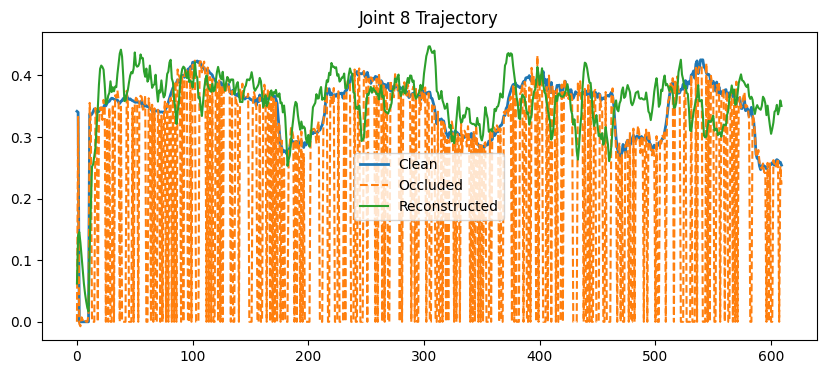

In [5]:
import matplotlib.pyplot as plt

def plot_compare(clean, occluded, reconstructed, joint_id=8):
    plt.figure(figsize=(10,4))

    plt.plot(clean[:, joint_id, 0], label="Clean", linewidth=2)
    plt.plot(occluded[:, joint_id, 0], label="Occluded", linestyle="dashed")
    plt.plot(reconstructed[:, joint_id*3], label="Reconstructed")

    plt.legend()
    plt.title(f"Joint {joint_id} Trajectory")
    plt.show()

plot_compare(clean, occluded, Y_pred[0])

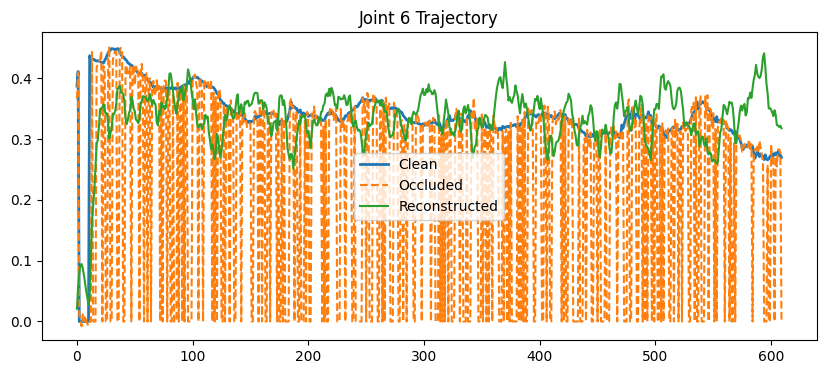

In [6]:
import matplotlib.pyplot as plt

def plot_compare(clean, occluded, reconstructed, joint_id=6):
    plt.figure(figsize=(10,4))

    plt.plot(clean[:, joint_id, 0], label="Clean", linewidth=2)
    plt.plot(occluded[:, joint_id, 0], label="Occluded", linestyle="dashed")
    plt.plot(reconstructed[:, joint_id*3], label="Reconstructed")

    plt.legend()
    plt.title(f"Joint {joint_id} Trajectory")
    plt.show()

plot_compare(clean, occluded, Y_pred[0])


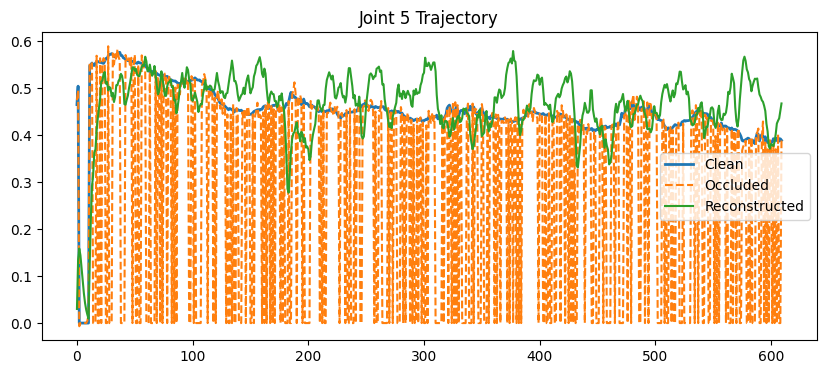

In [8]:
import matplotlib.pyplot as plt

def plot_compare(clean, occluded, reconstructed, joint_id=5):
    plt.figure(figsize=(10,4))

    plt.plot(clean[:, joint_id, 0], label="Clean", linewidth=2)
    plt.plot(occluded[:, joint_id, 0], label="Occluded", linestyle="dashed")
    plt.plot(reconstructed[:, joint_id*3], label="Reconstructed")

    plt.legend()
    plt.title(f"Joint {joint_id} Trajectory")
    plt.show()

plot_compare(clean, occluded, Y_pred[0])


In [9]:
missing = 1 - mask
error = ((clean - Y_pred.reshape(clean.shape)) ** 2) * missing
mse = error.sum() / (missing.sum() + 1e-6)

print("Reconstruction MSE on missing joints:", mse)


Reconstruction MSE on missing joints: 0.015403300782826328
